In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import time

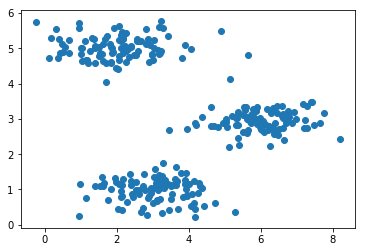

In [2]:
X = scipy.io.loadmat('ex7data2.mat')['X']
plt.scatter(X[:,0],X[:,1]);

In [3]:
def closestClass(X,centroids):
    m = X.shape[0];
    idx = np.zeros([X.shape[0]])
    for i in range(m):
        idx[i] = np.argmin(np.sum((centroids - X[i,:])**2,1))
              
    return idx.astype(int)

def updateCentroids(X,idx):
    K = len(np.unique(idx))
    centroids = np.zeros([K,X.shape[1]])
    for i in range(K):
        z = np.array(np.where(idx==i))[0]
        centroids[i] = np.mean(X[z,:],0)
        
    return centroids

def intializeCentroids(X,K):    
    centroids = np.zeros([K,X.shape[1]]);   
    centroids = X[np.random.randint(0,X.shape[0],(K,1)),:];
    return centroids.reshape([K,-1])

def ClusterCost(X,centroids):
    m = X.shape[0]
    idx = closestClass(X,centroids)
    cost = 1/m* np.sum((X - centroids[idx,:])**2)
    return cost

def plotClass(X,idx,centroids,ax):
    K = centroids.shape[0];
    for i in range(K):
        z = np.array(np.where(idx==i))[0]
        ax.scatter(X[z,0],X[z,1])
        ax.scatter(centroids[i,0],centroids[i,1],marker = 'x', c = 'k',s = 40)

In [4]:
def runKmeans(K,X,plot = False):
    centroids = intializeCentroids(X,K)
    
    if (plot):
        fig, ax_array = plt.subplots(2, 3, sharex=True, sharey=True,figsize = [10,5])
    cost = ClusterCost(X,centroids);
    cost_updated = cost;

    i = 0;
    while (cost_updated <=0.99*cost) or (i==0):
        print(cost,cost_updated)
        
        idx = closestClass(X,centroids)
        centroids = updateCentroids(X,idx)

        cost = cost_updated
        cost_updated = ClusterCost(X,centroids)
        
        if (plot):
            ax = ax_array.ravel()[i]
            plotClass(X,idx,centroids,ax)
        
        i +=1;  
        if(i>=6): i -=1
        time.sleep(0.5)
        
    return idx, centroids

6.962499076701131 6.962499076701131
6.962499076701131 2.2367429478526453
2.2367429478526453 1.3895352547011728
1.3895352547011728 0.9222568965993261
0.9222568965993261 0.8897660236902282


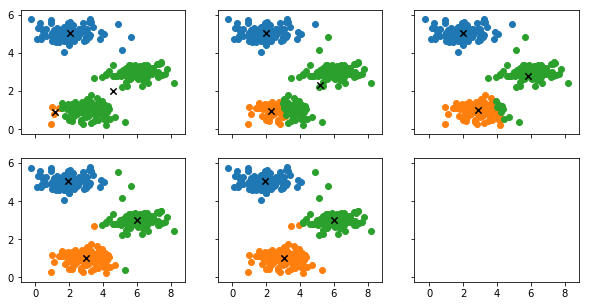

In [5]:
idx, centroids = runKmeans(3,X,True)

## Image Compression

In [6]:
img = plt.imread('bird_small.png')
img1 = img.reshape([img.shape[0]*img.shape[1],img.shape[2]])

In [7]:
K = 16
idx, centroids = runKmeans(K,img1)

0.023272937163710594 0.023272937163710594
0.023272937163710594 0.01115650317174357
0.01115650317174357 0.009814984232416057
0.009814984232416057 0.009295758999957337
0.009295758999957337 0.008949863431743886
0.008949863431743886 0.008673510043468986
0.008673510043468986 0.008450148444601364
0.008450148444601364 0.00831239060020859
0.00831239060020859 0.008215959741060597


In [8]:
img1 = centroids[idx,:].reshape([img.shape[0],img.shape[1],img.shape[2]])

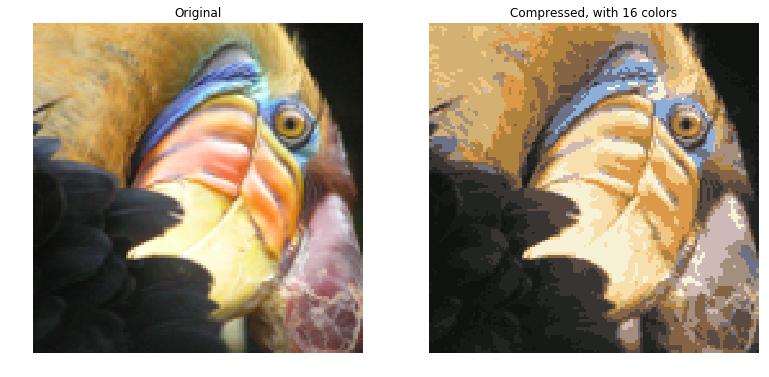

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,9))
ax1.imshow(img)
ax1.set_title('Original')
ax2.imshow(img1)
ax2.set_title('Compressed, with {} colors'.format(K))

for ax in fig.axes:
    ax.axis('off')